# INFO-F-422 -  Statistical Foundations of Machine Learning 

### Student 1 - [Kate.Suzanna.Delbeke@vub.be](Kate.Suzanna.Delbeke@vub.be) - Student ID 577345
### Student 2 - [Somayyeh.Gholami@vub.be](somayyeh.gholami@vub.be) - Student ID 562113
### Student 3 - [yiming.yan@vub.be](yiming.yan@vub.be) - Student ID 573780

### Video presentation: https://www.youtube.com/watch?v=5_F78Vy16yo

## Pump it Up: Data Mining the Water Table


# 1.Introduction


<div class="alert alert-info" role="alert">
  <h1 class="alert-heading"> Pump it Up: Data Mining the Water Table</h1>
  <h4 class="font-weight-bold">The goal of this project is to simplify the maintenance processing of water pumps and guarantee that clean, potable water is available to every Tanzanian.</h4>
  <hr>
  <p class="font-weight-bold">This notebook aims to build a predictive model which is able to correctly predict which pumps are functional, which need some repairs, and which don’t work at all, using data from Taarifa and the Tanzanian Ministry of Water. The model will be trained using the given Training set values, Training set labels files available on the DrivenData platform, it includes roughly 60000 labeled samples and 40 features. We will be applying 3 different models on the dataset and evaluating them accordingly</p>
</div>

<div class="alert alert-light" role="alert">
  <h3 class="alert-heading"> The main steps we're going to do in this project: </h3>
</div>


- **Data preprocessing**
 - **Retrieve data into the DataFrame To easily manipulate**
 - **Handle data types in datasets like missing values, categorical variables**
 - **Design pipelines to enhance the performance of machine learning**
 - **Feature Selections and Feature Engineering**
<br>
<br>
- **Define a model**<br>
 - **Decision Trees**
 - **KNN Model**
 - **Random Forest Tree**
 - **xgboost**
<br>
- **Applying different models of machines learning and examinate the results(scores),To check which the model works better with this datatset**
<br>
<br>
- **Fit a Model**
<br>
<br>
- **Make prediction**
<br>
<br>
- **Validate The model**
 - **Applying the advanced techniques for model validation (for example: cross-validation)**


<div class="alert alert-warning" role="alert">
    <h1 class="alert-heading">2.Data preprocessing</h1>
    <h3 class="alert-heading">2.0 Load Packets(Import necessary libraries)</h3>
</div>


**If packages are not installed, error will occur.
<br>Make sure they are installed.**

In [2]:
install.packages(c("tidyverse","GoodmanKruskal","rpart","randomForest","lazy","xgboost","Matrix","MatrixModels","data.table"))


Warning message in install.packages(c("tidyverse", "GoodmanKruskal", "rpart", "randomForest", :
“installation of package ‘rpart’ had non-zero exit status”
Warning message in install.packages(c("tidyverse", "GoodmanKruskal", "rpart", "randomForest", :
“installation of package ‘randomForest’ had non-zero exit status”
Warning message in install.packages(c("tidyverse", "GoodmanKruskal", "rpart", "randomForest", :
“installation of package ‘lazy’ had non-zero exit status”
Warning message in install.packages(c("tidyverse", "GoodmanKruskal", "rpart", "randomForest", :
“installation of package ‘Matrix’ had non-zero exit status”
Warning message in install.packages(c("tidyverse", "GoodmanKruskal", "rpart", "randomForest", :
“installation of package ‘data.table’ had non-zero exit status”
Warning message in install.packages(c("tidyverse", "GoodmanKruskal", "rpart", "randomForest", :
“installation of package ‘xgboost’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'p

In [2]:
library(tidyverse)
library(GoodmanKruskal)
library(rpart)
library(randomForest)
library(lazy)

Warning message:
"package 'tidyverse' was built under R version 4.0.5"
-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.1.1     v dplyr   1.0.5
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

Warning message:
"package 'ggplot2' was built under R version 4.0.5"
Warning message:
"package 'tibble' was built under R version 4.0.5"
Warning message:
"package 'tidyr' was built under R version 4.0.5"
Warning message:
"package 'readr' was built under R version 4.0.5"
Warning message:
"package 'purrr' was built under R version 4.0.5"
Warning message:
"package 'dplyr' was built under R version 4.0.5"
Warning message:
"package 'stringr' was built under R version 4.0.5"
Warning message:
"package 'forcats' was built under R version 4.0.5"
-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() -

<div class="alert alert-warning" role="alert">
    <h3 class="alert-heading">2.1 Read the csv File and convert them to dataframe</h3>
</div>

In [3]:
#Read File
Train <- read.csv("TrainingSetValues.csv", header = TRUE)
class_var <- read.csv('TrainingSetLabels.csv', header = TRUE)
Train

id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
<int>,<dbl>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<chr>,<int>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
69572,6000,2011-03-14,Roman,1390,Roman,34.93809,-9.85632177,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
8776,0,2013-03-06,Grumeti,1399,GRUMETI,34.69877,-2.14746569,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
34310,25,2013-02-25,Lottery Club,686,World vision,37.46066,-3.82132853,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
67743,0,2013-01-28,Unicef,263,UNICEF,38.48616,-11.15529772,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
19728,0,2011-07-13,Action In A,0,Artisan,31.13085,-1.82535885,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
9944,20,2011-03-13,Mkinga Distric Coun,0,DWE,39.17280,-4.76558728,Tajiri,0,...,per bucket,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe
19816,0,2012-10-01,Dwsp,0,DWSP,33.36241,-3.76636472,Kwa Ngomho,0,...,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
54551,0,2012-10-09,Rwssp,0,DWE,32.62062,-4.22619802,Tushirikiane,0,...,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
53934,0,2012-11-03,Wateraid,0,Water Aid,32.71110,-5.14671181,Kwa Ramadhan Musa,0,...,never pay,salty,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump


In [4]:
colnames(Train) 

[1] "id"                    "amount_tsh"            "date_recorded"        
 [4] "funder"                "gps_height"            "installer"            
 [7] "longitude"             "latitude"              "wpt_name"             
[10] "num_private"           "basin"                 "subvillage"           
[13] "region"                "region_code"           "district_code"        
[16] "lga"                   "ward"                  "population"           
[19] "public_meeting"        "recorded_by"           "scheme_management"    
[22] "scheme_name"           "permit"                "construction_year"    
[25] "extraction_type"       "extraction_type_group" "extraction_type_class"
[28] "management"            "management_group"      "payment"              
[31] "payment_type"          "water_quality"         "quality_group"        
[34] "quantity"              "quantity_group"        "source"               
[37] "source_type"           "source_class"          "waterpoint_type"      
[40] "waterpoint_type_group"

<div class="alert alert-warning" role="alert">
    <h3 class="alert-heading">The above cell gives us the all features:</h3>
</div>
'id''amount_tsh''date_recorded''funder''gps_height''installer''longitude''latitude''wpt_name''num_private'
<br>'basin''subvillage''region''region_code''district_code''lga''ward''population''public_meeting''recorded_by'
<br>'scheme_management''scheme_name''permit''construction_year''extraction_type''extraction_type_group'
<br>'extraction_type_class''management''management_group''payment''payment_type''water_quality''quality_group'
<br>'quantity''quantity_group''source''source_type''source_class''waterpoint_type''waterpoint_type_group'


In [5]:
summary(Train)
nrow(Train)#amount of rows
ncol(Train)#amount of columns

       id          amount_tsh       date_recorded         funder         
 Min.   :    0   Min.   :     0.0   Length:59400       Length:59400      
 1st Qu.:18520   1st Qu.:     0.0   Class :character   Class :character  
 Median :37062   Median :     0.0   Mode  :character   Mode  :character  
 Mean   :37115   Mean   :   317.7                                        
 3rd Qu.:55657   3rd Qu.:    20.0                                        
 Max.   :74247   Max.   :350000.0                                        
   gps_height      installer           longitude        latitude      
 Min.   : -90.0   Length:59400       Min.   : 0.00   Min.   :-11.649  
 1st Qu.:   0.0   Class :character   1st Qu.:33.09   1st Qu.: -8.541  
 Median : 369.0   Mode  :character   Median :34.91   Median : -5.022  
 Mean   : 668.3                      Mean   :34.08   Mean   : -5.706  
 3rd Qu.:1319.2                      3rd Qu.:37.18   3rd Qu.: -3.326  
 Max.   :2770.0                      Max.   :40.35   Max

[1] 59400

[1] 40

<div class="alert alert-warning" role="alert">
    <h4 class="alert-heading">Above, we find a small summary of the data, together with the size of the pump_data (59400,40). We have 40 features for almost 60000 datapoints.</h4>
</div>

<div class="alert alert-danger" role="alert">
    <h2> 2.2 Feature selection</h2>
</div>

### <b>Feature selection is the process of reducing the number of input variables for a predictive model, To enhance the performance of the model and reduce the computational cost.</b>
* **Feature selection methods examine the relationship between each input variable and the target variable using statistics and chose the input variables that have the greatest influence on or relationship with the target variable. Features that are highly correlated to the dependant variable are considered to be highly informative.** 
* **Choosing appropriate statistical measures is dependant on the data type of both the input and output variables.**
* **The main types of feature selection techniques are supervised and unsupervised techniques**
 * **We will be working with supervised methods since the data to do so is available.**
      * **wrapper techniques**
      * **filter techniques**
      * **intrinsic or embedded techniques**  
* Wrapper methods function as a wrapper around a predictive model (and are thus dependant on the predictive method). They are also quite computationally expensive and prone to overfitting, which is why we will decide against them. Embedded methods select features during the model building phase and are thus also dependant on the predictive model. Filter methods use general characteristics such as correlation to the dependant variable to filter out features that are not relevant. This works based on a heuristic threshold. It is a very simple and fast method that functions independently of a predictive model and usually works well with large numbers of features. They also avoid overfitting a lot better than wrapper methods. For these reasons, we will be opting for a filter method. One thing we need to keep in mind is that filter methods sometimes fail to include important features in the model.

http://www.datasciencesmachinelearning.com/2019/10/feature-selection-filter-method-wrapper.html



<div class="alert alert-danger" role="alert">
    <h2>Features To Remove(drop):</h2>
</div>

### The following features will be dropped because we do not bellieve they can influence the model. 

- **col 2, amount_tsh:** The static head (amount of water available to waterpoint) For this feature, there are too many zero values.<br>
- **col 9, wpt_name :** It seems to be the name of the water point. But could a name influence the functionality?<br>
- **col 10,num_private:** All values are 0. A feature with no variability can not be an informative one.<br>
- **col 12 13, subvillage & region:** Could be identified with region_code<br>
- **col 17, ward:** It seems like the name of person who guard the pump. Too manyunique values.<br>
- **col 20,recordrd_by:** It does not matter who recorded the data.<br>
- **col 22,scheme_name:** Too many missing values and we think it will not influence the functionality.<br>
- **col 25 26,extraction_type & extraction_type_group:** Similar to col 27: extraction_type_class<br>
- **col 31,payment_type: Similar to col 30:** payment<br>
- **col 35,quantity_group : Similar to col 34:** quantity<br>
- **col 39 40,waterpoint_type waterpoint_type_group:** Type of waterpoint should not influence the result.

In [6]:
#Removing unnecessary columns
Train[, c(2,9,10,12,13,17,20,21,22,25,26,31,35,39,40)] <- NULL

<div class="alert alert-danger" role="alert">
    <h4>Some other features To Remove:</h4>
</div>

In [7]:
Train$longitude<-NULL
Train$latitude<-NULL
Train$basin<-NULL
Train$lga<-NULL
Train$management<-NULL
Train$management_group<-NULL
Train$water_quality<-NULL
Train$source<-NULL
Train$source_type<-NULL


- **longitude and latitude:** Those variables could help us to find where are the pumps, but cannot provide any help with the model. We assume the region_code variable gives us enough information about how location may influence the working of the pumps.
- **basin:** We think region_code is enough to show where the pump is.
- **lga:** Too many unique values. Features that are too heterogeneous are usually not informative.
- **management & management_group:** Those columns always have the same values but corresponding to different results.It seems not the **"management"** that will have an effect on the maintenance of the pump.
- **water_quality:** Similar to quality_group.
- **And moreover, we have feature source and source_type, but we think source_class is enough.**

In [8]:
Train

id,date_recorded,funder,gps_height,installer,region_code,district_code,population,public_meeting,permit,construction_year,extraction_type_class,payment,quality_group,quantity,source_class
<int>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
69572,2011-03-14,Roman,1390,Roman,11,5,109,True,False,1999,gravity,pay annually,good,enough,groundwater
8776,2013-03-06,Grumeti,1399,GRUMETI,20,2,280,,True,2010,gravity,never pay,good,insufficient,surface
34310,2013-02-25,Lottery Club,686,World vision,21,4,250,True,True,2009,gravity,pay per bucket,good,enough,surface
67743,2013-01-28,Unicef,263,UNICEF,90,63,58,True,True,1986,submersible,never pay,good,dry,groundwater
19728,2011-07-13,Action In A,0,Artisan,18,1,0,True,True,0,gravity,never pay,good,seasonal,surface
9944,2011-03-13,Mkinga Distric Coun,0,DWE,4,8,1,True,True,2009,submersible,pay per bucket,salty,enough,unknown
19816,2012-10-01,Dwsp,0,DWSP,17,3,0,True,True,0,handpump,never pay,good,enough,groundwater
54551,2012-10-09,Rwssp,0,DWE,17,3,0,True,True,0,handpump,unknown,milky,enough,groundwater
53934,2012-11-03,Wateraid,0,Water Aid,14,6,0,True,True,0,handpump,never pay,salty,seasonal,groundwater


<div class="alert alert-danger" role="alert">
</div>

<div class="alert alert-info" role="alert">
  <h2 class="alert-heading">2.3 Missing value imputation</h2>
  <h4>Most machine learning libraries produce an error while you try to build a model using data included missing values. Therefore it's needed to choose one strategy to deal with them.</h4>
  <hr>
  <p class="mb-0">In machine learning with python, to deal with missing values and preparing the data for machine learning, better said, to impute the numerical and categorical data; There are some approaches like using the SimpleImputer library from sklearn.impute which replaces NaN valuse by a specified placeholder, extensive imputer, etc. All of which are available in the built-in the SciKit learn. Of course, these need to be applied for both the training and validation sets. Another way of dealing with these values is by dropping the columns with NaN values. This is clearly suboptimal because it can cause us to lost quite a few datapoints.

Then Scikit-learn provided the Pipeline module to the training data and fit the model in a single line of code. This gives a much better score than imputing the train and validation set manually.
Although both of them have the same concept, the pipeline (Python-Sklearn) raises the score and reduces MAE better than manual imputation.
      
In this project with R,we manually fix missing values of “year” feature by replacing them by the median values in blank spaces.</p>
</div>

## <u>Missing value imputation</u>
After removing some unrelated features, there are about 20 features left. Few of them have missing values.<br>
"construction_year" have many missing values and we think this attribute is related to the functionality of pump, therefore we deal with missing values by fill median values in blank spaces.<br>
And insert a new colume "age" to replace "construction_year" and "date_recorded".

In [9]:
install.packages("stringr")


Warning message:
"package 'stringr' is in use and will not be installed"


In [10]:
install.packages("tidyverse/stringr")

Warning message:
"package 'stringr' is in use and will not be installed"


In [11]:
install.packages("tidyverse")


Warning message:
"package 'tidyverse' is in use and will not be installed"


In [12]:
library("stringr")

In [13]:

#create new col to extract year from date recorded
Train$year_recorded <- str_sub(Train$date_recorded, 1, 4)#library(tidyverse)
#Now use year_recorded and construction_year to find age of the well
Train$year_recorded <- as.numeric(Train$year_recorded)
Train$construction_year <- as.numeric(Train$construction_year)
#before using construction year, deal with its null values 
#We consider the possibility of loss of data among the pump constructed in different year is the equivalent.
Train$construction_year[Train$construction_year<1960]= median(Train$construction_year[Train$construction_year>1960])
#medianYr <- median(pump_data$construction_year)
#pump_data$construction_year[pump_data$construction_year == 0] <- medianYr
#How old is the pump
Train$age <- Train$year_recorded - Train$construction_year
Train$age[Train$age < 0] <- 0
#Now we have age and year_recorded, and drop construction year and date recorded
Train$construction_year<-NULL
Train$date_recorded<-NULL


In [14]:
Train

id,funder,gps_height,installer,region_code,district_code,population,public_meeting,permit,extraction_type_class,payment,quality_group,quantity,source_class,year_recorded,age
<int>,<chr>,<int>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
69572,Roman,1390,Roman,11,5,109,True,False,gravity,pay annually,good,enough,groundwater,2011,12
8776,Grumeti,1399,GRUMETI,20,2,280,,True,gravity,never pay,good,insufficient,surface,2013,3
34310,Lottery Club,686,World vision,21,4,250,True,True,gravity,pay per bucket,good,enough,surface,2013,4
67743,Unicef,263,UNICEF,90,63,58,True,True,submersible,never pay,good,dry,groundwater,2013,27
19728,Action In A,0,Artisan,18,1,0,True,True,gravity,never pay,good,seasonal,surface,2011,11
9944,Mkinga Distric Coun,0,DWE,4,8,1,True,True,submersible,pay per bucket,salty,enough,unknown,2011,2
19816,Dwsp,0,DWSP,17,3,0,True,True,handpump,never pay,good,enough,groundwater,2012,12
54551,Rwssp,0,DWE,17,3,0,True,True,handpump,unknown,milky,enough,groundwater,2012,12
53934,Wateraid,0,Water Aid,14,6,0,True,True,handpump,never pay,salty,seasonal,groundwater,2012,12


<div class="alert alert-info" role="alert">
</div>

<div class="alert alert-success" role="alert">
    <h2>2.4 Feature engineering</h2>
</div>

 **Feature engineering aims to make the data more compatible to the available problem by using domain knowledge.**
* **Enhances the performance of model's prediction**
* **Lowers need of the computational or data**
* **Enhances the interpretability of the results**

We think funder and installer may influence the result.Funder and installer may determine the quality of facilities. But there are tens of different values.<br>
Find top 15 funder and installer and set others as "other".<br>
This is the part of train set data processing. To guarantee the prediction will work, we should make sure the test set have the same levels as the train set.

In [15]:
#funder- subsetted the top 15 funder and considered the rest as "other"

Train$funder <- tolower(Train$funder)
Train$funder[Train$funder %in% c(" ", "", "0", "_", "-")] <- "other"
funder.top <- names(summary(as.factor(Train$funder)))[1:15]
Train$funder[!(Train$funder %in% funder.top)] <- "other"
Train$funder <- as.factor(Train$funder)
#installer

Train$installer <- tolower(Train$installer)
Train$installer[Train$installer %in% c(" ", "", "0", "_", "-")] <- "other"
installer.top <- names(summary(as.factor(Train$installer)))[1:15]
Train$installer[!(Train$installer %in% installer.top)] <- "other"
Train$installer <- as.factor(Train$installer)
Train

id,funder,gps_height,installer,region_code,district_code,population,public_meeting,permit,extraction_type_class,payment,quality_group,quantity,source_class,year_recorded,age
<int>,<fct>,<int>,<fct>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
69572,other,1390,other,11,5,109,True,False,gravity,pay annually,good,enough,groundwater,2011,12
8776,other,1399,other,20,2,280,,True,gravity,never pay,good,insufficient,surface,2013,3
34310,other,686,world vision,21,4,250,True,True,gravity,pay per bucket,good,enough,surface,2013,4
67743,unicef,263,other,90,63,58,True,True,submersible,never pay,good,dry,groundwater,2013,27
19728,other,0,other,18,1,0,True,True,gravity,never pay,good,seasonal,surface,2011,11
9944,other,0,dwe,4,8,1,True,True,submersible,pay per bucket,salty,enough,unknown,2011,2
19816,dwsp,0,other,17,3,0,True,True,handpump,never pay,good,enough,groundwater,2012,12
54551,rwssp,0,dwe,17,3,0,True,True,handpump,unknown,milky,enough,groundwater,2012,12
53934,other,0,other,14,6,0,True,True,handpump,never pay,salty,seasonal,groundwater,2012,12


<div class="alert alert-success" role="alert">
    <h3>Calculation the Correlation</h3>
    <p>
After manually editing several features, we can finally apply a filter method to our data. Association between categorical variables can be measured by the Goodman-Kruskal (GK) statistics. These metrics measure the association between two variables, based on how well you can predict the value of one variable based on the other.
        
There are a few important measures: GK gamma ($\gamma$), GK lambda ($\lambda$) and GK tau ($\tau$). We will not further elaborate on GK gamma. Lambda shows the improvement in probability of knowing the dependant variable, given the value of the other variable (in percentage). Tau shows the improvement in predictability of the dependant variable, given the value of the other variable. This is calculated based on random category assignment, with probabilities specified by marginal proportions (and not the probability of the modal category such as with GK lambda). We will focus on the values of GK tau. This value can range from -1 to +1, respectively a perfect negative and positive association. [Source 1](https://support.minitab.com/en-us/minitab/18/help-and-how-to/statistics/tables/how-to/cross-tabulation-and-chi-square/interpret-the-results/all-statistics-and-graphs/measures-of-association/#goodman-kruskal-lambda-and-tau)
[Source 2](https://cran.r-project.org/web/packages/GoodmanKruskal/vignettes/GoodmanKruskal.html)
    
The GKtauDataframe function that we use computes the GK tau score for all pairwise combinations of features.
    <p>
</div>

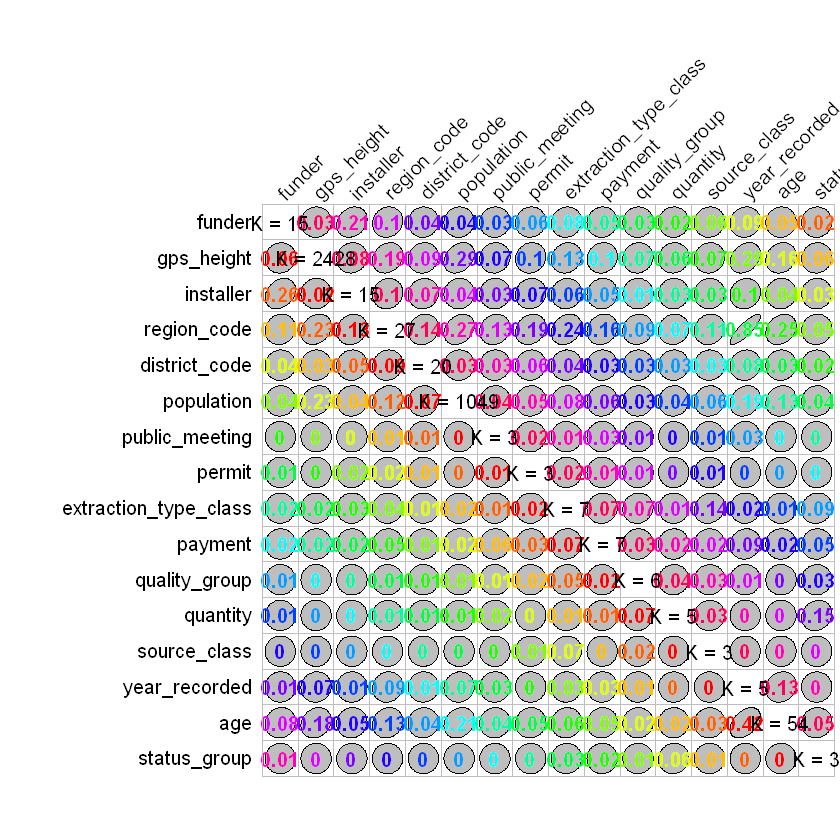

In [16]:
Train <- merge(Train, class_var, by = 'id', all.x = TRUE)
#Before plotting, remove id. ID will not contribute to the model. 
Train[,1]<-NULL
#Inspired by:
#https://www.rdocumentation.org/packages/GoodmanKruskal/versions/0.0.3/topics/GKtauDataframe
gkm <- GKtauDataframe(Train)
plot(gkm)

<div class="alert alert-success" role="alert">
    <h3>Finally Remove those variables with zero association</h3>
    <p> As we can see in the gkm figure, the public_meeting, permit, source_class and year_recorded features have no correlation with the status. These will be removed.
</div>

In [17]:
Train[,c(7,8,13,14)]<-NULL
Train

funder,gps_height,installer,region_code,district_code,population,extraction_type_class,payment,quality_group,quantity,age,status_group
<fct>,<int>,<fct>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
tasaf,0,other,14,3,0,handpump,unknown,milky,enough,12,non functional
other,1978,other,11,4,20,rope pump,never pay,good,enough,3,functional
other,0,other,1,4,0,motorpump,pay per bucket,good,insufficient,11,functional
other,1639,ces,3,5,25,gravity,pay per bucket,good,enough,14,functional
other,0,other,1,4,0,handpump,unknown,good,dry,11,non functional
other,28,other,60,43,6922,submersible,pay per bucket,good,enough,11,functional
government of tanzania,0,government,17,3,0,other,never pay,good,seasonal,12,non functional
other,0,other,1,1,0,other,never pay,milky,insufficient,11,functional
other,0,commu,1,5,0,motorpump,pay per bucket,good,dry,11,non functional


<div class="alert alert-warning" role="alert">
    <h2>2.5 Dataset:Summary</h2>
    <h4>The status of pump base on different features.</h4>
</div>

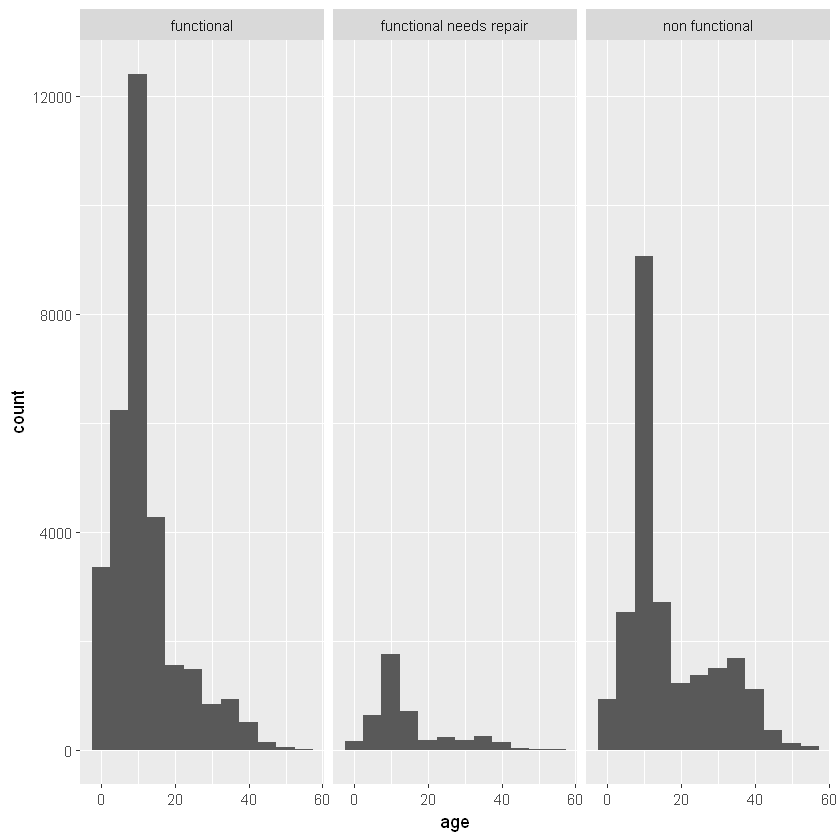

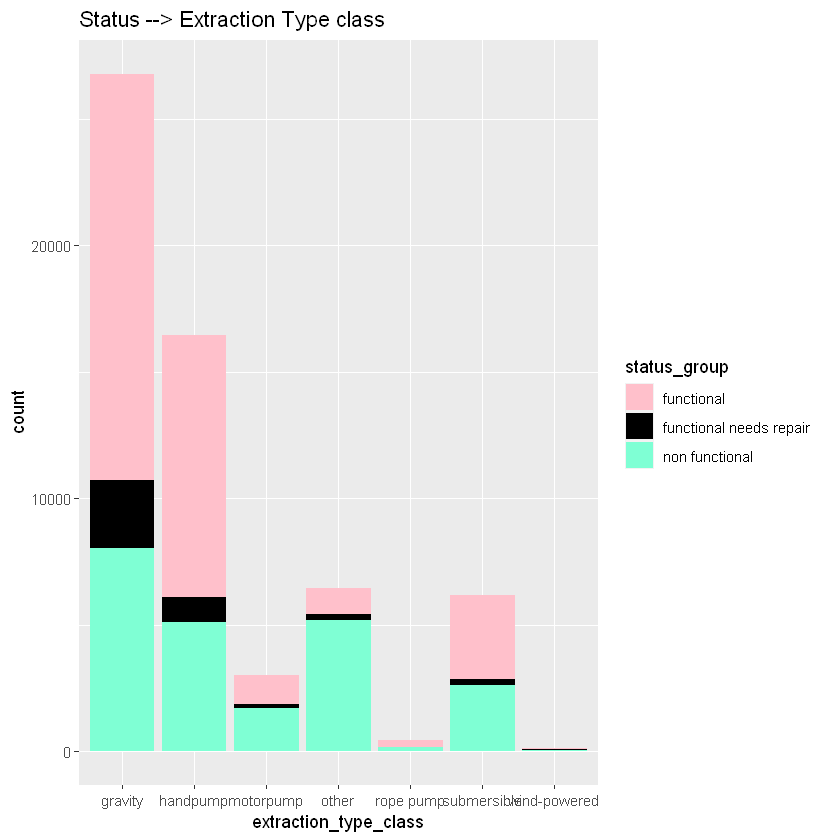

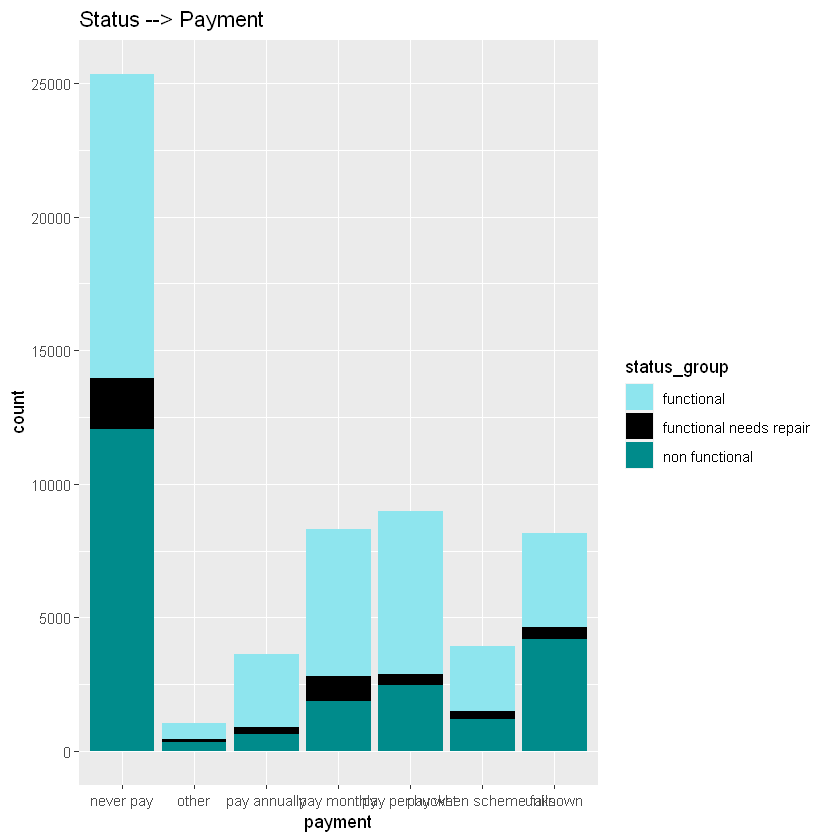

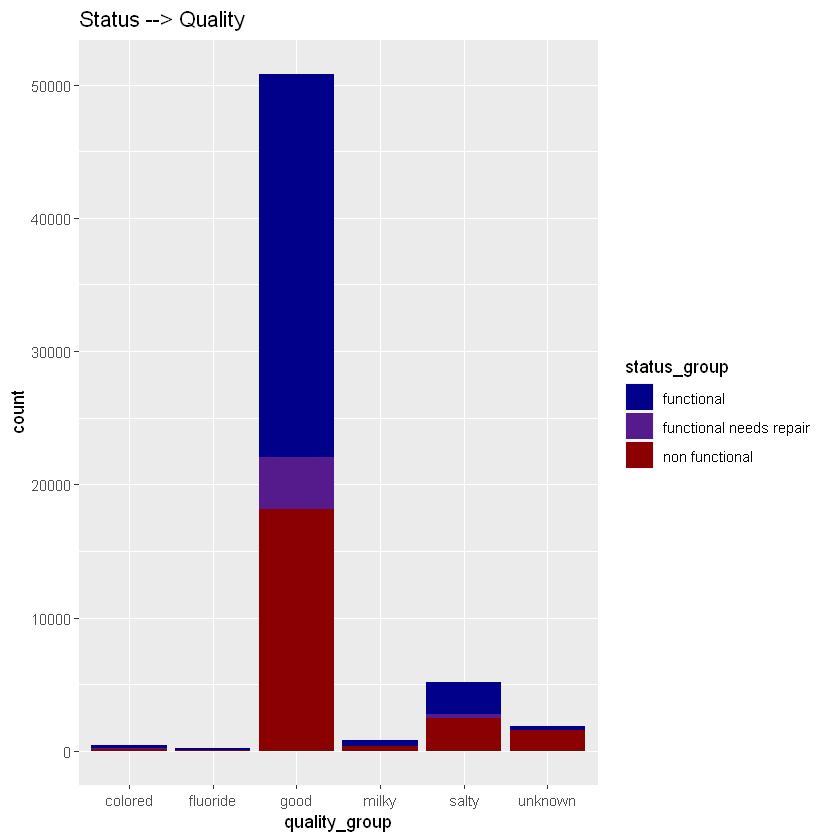

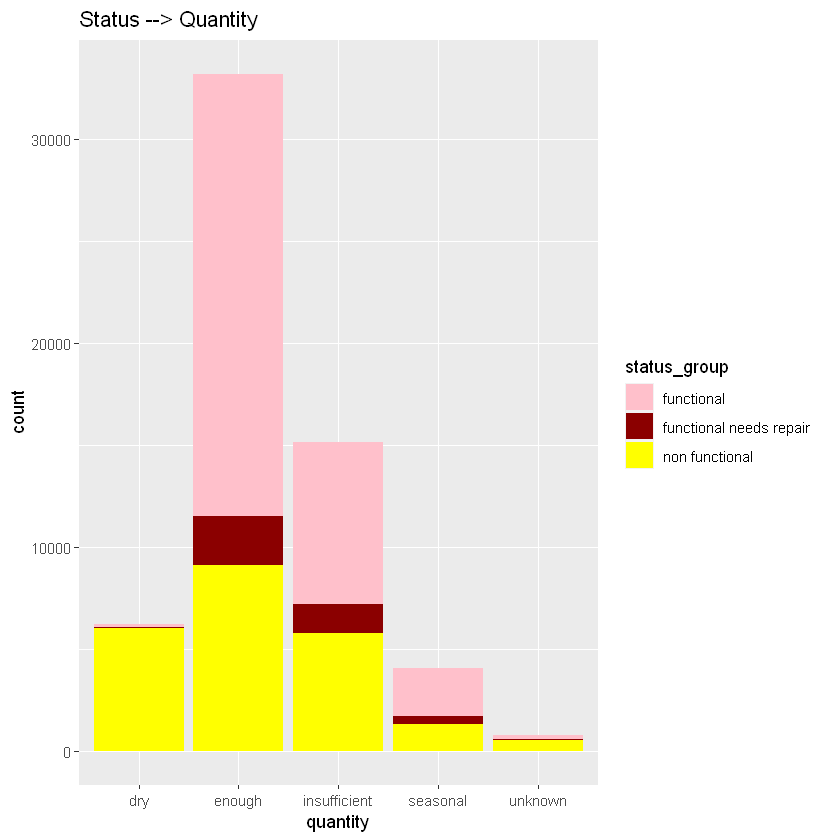

In [18]:
#library ggplot to show the status of data
ggplot(subset(Train, age > 0), aes(x = age)) +
  geom_histogram(binwidth = 5) +
  facet_grid( ~ status_group)

ggplot(data=Train, aes(x=extraction_type_class,fill=status_group)) +
  geom_bar()+ggtitle("Status --> Extraction Type class")+scale_fill_manual(values=c("pink","black","aquamarine"))

ggplot(data=Train, aes(x=payment,fill=status_group)) +
  geom_bar()+ggtitle("Status --> Payment")+scale_fill_manual(values=c("cadetblue2","black","cyan4"))

ggplot(data=Train, aes(x=quality_group,fill=status_group)) +
  geom_bar()+ggtitle("Status --> Quality")+scale_fill_manual(values=c("blue4","purple4","red4"))

ggplot(data=Train, aes(x=quantity,fill=status_group)) +
  geom_bar()+ggtitle("Status --> Quantity")+scale_fill_manual(values=c("pink","darkred","yellow"))


<div class="alert alert-warning" role="alert">
    <h2>Splitting the dataset to train and validation set for three models.</h2>
    <p>There are many different ways of validating a dataset such as train-test split, cross-validation (CV), OOB  for bootstrapping techniques, etc. The simplest of these is the train-test split, where the data randomly gets split into a training portion and a testing portion of the dataset to evaluate the model on unseen data. This is commonly done according to a 70/30, 80/20 (or even 90/10)  frequency. For fairly large datasets like ours however, a train-test split might offer the best trade-off between computing power and variance reduction. We conclude that an 80/20 split is appropriate for a dataset of our size. If we would decide that our model is overfitting, we can use another validation technique that further reduces variance.</p>
</div>


In [41]:
#splitting the dataset into training and train data in 80:20 ratio 

size<-floor(nrow(Train)*0.8)
index <- sample(1:nrow(Train), size)#Select 80% of the rows randomly with sample() function

pump_train<-Train[index,]
pump_tst<-Train[-index,]
#normalization

pump_train2 <- pump_train %>%
  mutate_if(is.numeric, scale)
pump_tst2 <- pump_tst %>%
  mutate_if(is.numeric, scale)

pump_train3<-pump_train2
pump_tst3<-pump_tst2

pump_tst3

,funder,gps_height,installer,region_code,district_code,population,extraction_type_class,payment,quality_group,quantity,age,status_group
,<fct>,"<dbl[,1]>",<fct>,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>",<chr>,<chr>,<chr>,<chr>,"<dbl[,1]>",<chr>
1,tasaf,-0.9632358,other,-0.07106301,-0.26975186,-0.38249412,handpump,unknown,milky,enough,-0.20196079,non functional
10,other,-0.9632358,other,0.15939589,0.25616997,-0.38249412,motorpump,never pay,good,insufficient,-0.29952480,non functional
27,kkkt,2.1148380,kkkt,-0.76243972,0.04580124,0.14460125,gravity,pay when scheme fails,good,insufficient,-1.08003691,functional
30,other,-0.9632358,other,0.10178117,-0.26975186,-0.38249412,other,unknown,good,insufficient,-0.10439678,non functional
37,government of tanzania,0.2115020,government,-0.70482500,-0.26975186,0.98795384,submersible,pay per bucket,good,insufficient,0.09073125,functional
41,other,-0.9632358,other,-0.82005445,-0.16456749,-0.38249412,handpump,never pay,good,insufficient,-0.29952480,functional
44,other,-0.9632358,hesawa,0.21701062,0.04580124,-0.38249412,handpump,pay monthly,good,insufficient,-0.29952480,functional
53,government of tanzania,0.6098410,community,-0.76243972,0.15098561,0.41869084,gravity,unknown,good,insufficient,-0.39708882,functional
58,other,0.3100004,dwe,-0.30152192,-0.37493623,-0.38249412,gravity,pay annually,good,enough,-0.29952480,functional


<div class="alert alert-info" role="alert">
<h1>3.Model Selection</h1>
</div>


The dataset has been divided. We will use the train set to train the model and validation set to check how those three models work.<br>
Prediction will be made on test set and decision will be based on accuracy.

#### Accuracy

\begin{equation}
A = \frac{T_P + T_N}{N} = \frac{T_P + T_N}{F_P + F_N + T_P + T_N} = \frac{Correct predictions}{Size of dataset.}
\end{equation}

The accuracy represents the ratio between the number of correctly classified samples (False ...) and the total number of samples.

##### A note on the accuracy score
Accuracy scores are a good metric to use on balanced data. If there is an imbalance between the frequency of the different categories, we might be better off using the F1-score. A simple example to illustrate this: Imagine our dependant variable can take on the values "yes" and "no". Their respective frequencies are 95% and 5%. It is easy to see how we can make a model that will predict yes all the time and have an accuracy of 95%, while not being a good model at all.

For this reason we will check the distribution of the classes in our dependant variable. We see that there is a mild imbalance. The frequency of our least common category is <15% of our most prevalent category.

In [20]:
#table to show the count of each class to look for an imbalance
table(pump_train$status_group)


             functional functional needs repair          non functional 
                  25739                    3445                   18336 

#### F1-Score
In imbalanced cases it might be better to use a metric such as F1-score. This score can be calculated as follows:

\begin{equation}
F1= 2* \frac{Precision * Recall}{Precision + Recall}
\end{equation}

Here, precision is a measure for how accurately our model predicts a positive. This is useful if the cost of the false positive is high. 

\begin{equation}
Precision=\frac{T_P}{T_P + F_P}
\end{equation}

Recall is a measure for how many of the actual positive values our model captures. This is useful when there is a high cost associated with false negatives.

\begin{equation}
Recall=\frac{T_P}{T_P + F_N}
\end{equation}

Here we implement functions to calculate F1 Score and Macro F1-Score based on confusion matrix.

In [42]:
F1<- function(posTP,posFP,posFN,confusion_matrix,map) {
TP<-sum(confusion_matrix[posTP])
FP<-sum(confusion_matrix[posFP])
FN<-sum(confusion_matrix[posFN])
    FScore<-2*TP/(2*TP+FP+FN)
    return(FScore)
}
getPos<-function(value,Matrix){#Return the position(x,y) of the value in a matrix.
    for (i in 1:nrow(Matrix)){
        for (j in 1:ncol(Matrix)){
         if (Matrix[i,j]==value){
             return(c(i,j))
         }   
        }
    }
    return(0)
}
MacroF1<-function(funcPos,nonFuncPos,needRepPos,confusion_matrix){ #Position of TP, for example. 1 5 9 in confusion matrix
    map<- matrix(c(1:9), nrow = 3, byrow = FALSE)
    order<-c(funcPos,nonFuncPos,needRepPos)
    sum<-0
    for (i in 1:3){
        posTP<-order[i]   
        location<-getPos(posTP,map)
        row<-location[1]
        col<-location[2]
        SameCol<-map[,col]
        SameRow<-map[row,]
        posFN<-SameCol[-row]#The items in the same column are FN
        posFP<-SameRow[-col]#Items in the same row are FP
        sum=sum+F1(posTP,posFP,posFN,confusion_matrix,map)    
    }
    return (sum/3)
}

## Model 1 :Decision Trees
One of the Supervised Machine Learning algorithms is the Decision Tree uses a set of binary rules to calculate a target value. In this Tree, **the Root** is our first question and it performs the first split, **other nodes(Internal nodes)** in the Decision Tree represent a predictor variable (feature), **the edge between the nodes represents a Decision**, and the **Terminal nodes or leaves** represents an outcome (response variable).  

<div class="alert alert-info" role="alert">
    <h3>Model 1:Decision Trees(Advantages vs. disadvantages) </h3>
</div>


<u>**Advantages of Decision Tree:**</u>
- Easy to understand and interpreted.
- It is used as a classifier (for the categorical target variable) and also as a regressor (for the continuous target variable) so it applied for the classification and regression problems
- Better efficient performance with non-linear data, comparing with other Machine Learning algorithms
- Fast process since it uses only one feature per node to split the data.


<u>**Disadvantages of Decision Tree:**</u>

- Decision trees are not suitable for difficult decisions.
- A deep tree with lots of leaves will overfit because each prediction is coming from historical data from only a few houses at its leaf. 
- A shallow tree with few leaves will perform poorly because it fails to capture as many distinctions in the raw data.
- It faces the tension between underfitting and overfitting.

Reference : [kaggle machine learning](https://www.kaggle.com/dansbecker/random-forests)

In [22]:
pump_train

,funder,gps_height,installer,region_code,district_code,population,extraction_type_class,payment,quality_group,quantity,age,status_group
,<fct>,<int>,<fct>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
47731,other,0,other,14,5,0,other,never pay,good,dry,12,non functional
51910,other,1302,other,13,1,145,gravity,never pay,good,seasonal,7,functional needs repair
52988,other,379,other,5,6,1,submersible,pay per bucket,salty,insufficient,2,functional needs repair
21874,other,1350,other,16,1,1,submersible,unknown,good,enough,0,non functional
35043,other,1669,other,13,2,1,submersible,unknown,unknown,unknown,3,non functional
17633,government of tanzania,1088,community,2,7,130,gravity,unknown,good,enough,50,non functional
49311,dhv,431,dwe,5,4,30,handpump,pay monthly,good,insufficient,13,non functional
3625,private individual,22,other,6,1,60,submersible,pay per bucket,good,enough,1,functional
41493,other,0,other,18,30,0,gravity,never pay,good,enough,11,functional


In [23]:
pump_tst

,funder,gps_height,installer,region_code,district_code,population,extraction_type_class,payment,quality_group,quantity,age,status_group
,<fct>,<int>,<fct>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
10,other,0,other,18,8,0,motorpump,never pay,good,insufficient,11,non functional
11,other,64,other,4,5,150,submersible,pay per bucket,salty,insufficient,4,non functional
16,other,0,commu,1,3,0,motorpump,pay per bucket,salty,enough,11,functional
17,other,226,other,99,1,450,motorpump,pay per bucket,good,enough,1,functional
19,government of tanzania,0,other,1,4,0,motorpump,unknown,good,dry,11,non functional
20,other,76,other,7,2,250,other,pay per bucket,salty,enough,3,functional
29,world vision,0,world vision,17,5,0,handpump,unknown,good,enough,12,functional
34,other,0,other,5,1,300,handpump,pay annually,salty,insufficient,16,functional
46,unicef,846,government,10,3,80,gravity,pay monthly,good,enough,11,functional


#### Train the decision tree model.

In [24]:
start_time <- Sys.time()
dt_model<-rpart(status_group~.,data=pump_train)
dt_time <- Sys.time() - start_time
dt_time
dt_model

Time difference of 1.031241 secs

n= 47520 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 47520 21781 functional (0.541645623 0.072495791 0.385858586)  
  2) quantity=enough,insufficient,seasonal 41856 16422 functional (0.607654817 0.081350344 0.310994839)  
    4) extraction_type_class=gravity,handpump,motorpump,rope pump,submersible,wind-powered 38026 13390 functional (0.647872508 0.085388944 0.266738547)  
      8) age< 33.5 35316 11645 functional (0.670262770 0.084777438 0.244959792) *
      9) age>=33.5 2710  1218 non functional (0.356088561 0.093357934 0.550553506) *
    5) extraction_type_class=other 3830   956 non functional (0.208355091 0.041253264 0.750391645) *
  3) quantity=dry,unknown 5664   345 non functional (0.053848870 0.007062147 0.939088983) *

#### Importance of variables in decision trees:

In [25]:
data.frame(dt_model$variable.importance)

,dt_model.variable.importance
,<dbl>
quantity,3525.76332
extraction_type_class,1492.87472
quality_group,654.85576
age,494.23986
installer,75.94335


#### Make predictions

In [43]:
predict_dt <- predict(dt_model, pump_tst)
predict_dt 

,functional,functional needs repair,non functional
1,0.67026277,0.084777438,0.2449598
10,0.67026277,0.084777438,0.2449598
27,0.67026277,0.084777438,0.2449598
30,0.20835509,0.041253264,0.7503916
37,0.67026277,0.084777438,0.2449598
41,0.67026277,0.084777438,0.2449598
44,0.67026277,0.084777438,0.2449598
53,0.67026277,0.084777438,0.2449598
58,0.67026277,0.084777438,0.2449598
67,0.67026277,0.084777438,0.2449598


In [44]:
Y_pred<-c(1:nrow(predict_dt))
for (i in 1:nrow(predict_dt)){
if (predict_dt[i,1]>0.6){
Y_pred[[i]]<-"functional"    
}
}
for (i in 1:nrow(predict_dt)){
if(predict_dt[i,3]>0.75){Y_pred[i]<-"non functional"      
}}
for(i in 1:length(Y_pred)){
if(Y_pred[i]!="functional"&&Y_pred[i]!="non functional"){
    Y_pred[i]<-"functional needs repair"
}
}
#Y_pred

In [45]:
tstSet<-pump_tst$status_group
confusion_matrix1 <- table(Y_pred,tstSet)
confusion_matrix1

                         tstSet
Y_pred                    functional functional needs repair non functional
  functional                    5927                     743           2117
  functional needs repair        231                      71            404
  non functional                 268                      52           2067

In [46]:
size<-length(Y_pred)

t<-confusion_matrix1[c(1,5,9)]
accuracy<-sum(t)/size

sprintf('The accuracy in total for decision tree: %f ',accuracy)

#TP<-sum(confusion_matrix1[1])
#TN<-sum(confusion_matrix1[c(5,6,8,9)])
#FP<-sum(confusion_matrix1[c(4,7)])
#FN<-sum(confusion_matrix1[c(2,3)])
#FScore=2*TP/(2*TP+FP+FN)
#sprintf('If we divide the data to two classes, then the FScore for decision tree: %f ',FScore)
MacroScore<-MacroF1(1,5,9,confusion_matrix1)
sprintf('The Macro F1 for decision tree: %f ',MacroScore)

[1] "The accuracy in total for decision tree: 0.678872 "

[1] "The Macro F1 for decision tree: 0.487407 "

<div class="alert alert-warning" role="alert">
    <h2>Model 2: KNN(K Nearest Neighbor)</h2>
</div>

<br> A Supervised Machine Learning algorithm and a classifier that determines a new data point, **based on the features of its neighborhood**, belongs to which **target class**.

- **The main concept relies on feature similarity. KNN examines the similarity of a data point to its neighbors and classifies the data point into the class where there are the most similarities. (KNN algorithm can be used for regression problems as well.)**
- **The input is the labeled data set to predict the output of the data points**
- **A non-parametric model which uses a flexible number of parameters to build the model.**
- **KNN is a lazy algorithm, lazy models have less training time but more time in predicting while it memorizes the training data set instead of learning a discriminative function from the training data.**
- **Easy implementation**

In [47]:
#library("lazy") 
#Those features need to convert to factor or otherwise error will occur when training (and predicting).
pump_train2$status_group<-factor(pump_train2$status_group,levels=c('functional','non functional','functional needs repair'))
pump_train2$quantity<-factor(pump_train2$quantity,levels=c('dry','unknown','insufficient','enough','seasonal'))
pump_train2$quality_group<-factor(pump_train2$quality_group,levels=c('colored','fluoride','good','milky','salty','unknown'))
pump_train2$payment<-factor(pump_train2$payment,levels=c('never pay','unknown','pay annually','pay monthly','pay per bucket','pay when scheme fails','other'))
pump_train2$extraction_type_class<-factor(pump_train2$extraction_type_class,levels=c('gravity','handpump','motorpump','other','rope pump','submersible','wind-powered'))
pump_train2$funder<-factor(pump_train2$funder,levels=c('danida','dhv','district council','dwsp','government of tanzania','hesawa','kkkt','norad','other','private individual','rwssp','tasaf','unicef','world bank','world vision'))

pump_tst2$status_group<-factor(pump_tst2$status_group,levels=c('functional','non functional','functional needs repair'))
pump_tst2$quantity<-factor(pump_tst2$quantity,levels=c('dry','unknown','insufficient','enough','seasonal'))
pump_tst2$quality_group<-factor(pump_tst2$quality_group,levels=c('colored','fluoride','good','milky','salty','unknown'))
pump_tst2$payment<-factor(pump_tst2$payment,levels=c('never pay','unknown','pay annually','pay monthly','pay per bucket','pay when scheme fails','other'))
pump_tst2$extraction_type_class<-factor(pump_tst2$extraction_type_class,levels=c('gravity','handpump','motorpump','other','rope pump','submersible','wind-powered'))
pump_tst2$funder<-factor(pump_tst2$funder,levels=c('danida','dhv','district council','dwsp','government of tanzania','hesawa','kkkt','norad','other','private individual','rwssp','tasaf','unicef','world bank','world vision'))
tstStatus<-pump_tst2$status_group
pump_train2$status_group<-factor(pump_train2$status_group,levels=c('functional','non functional','functional needs repair'))
for (i in 1:ncol(pump_train2)){
    pump_train2[,i]<-as.numeric(pump_train2[,i])
    pump_tst2[,i]<-as.numeric(pump_tst2[,i])
}
pump_train2

,funder,gps_height,installer,region_code,district_code,population,extraction_type_class,payment,quality_group,quantity,age,status_group
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
48722,1,1.76544097,5,-0.24442946,-0.06684327,-0.29426374,1,3,3,1,0.391839822,2
21864,8,1.75967567,12,-0.01773330,-0.17030882,2.25257351,1,1,3,1,1.366282132,2
58367,5,1.29412821,9,-0.30110349,-0.27377436,-0.23691211,1,2,3,4,-0.485158258,3
26866,9,0.12377359,8,-0.01773330,-0.27377436,-0.37922912,4,6,3,4,-0.874935182,2
19665,5,1.57806892,8,-0.75449581,-0.37723990,-0.06273308,1,6,3,4,-0.485158258,1
39900,2,-0.53346989,13,-0.58447369,-0.27377436,0.25588709,2,1,3,3,1.658614825,2
55464,9,-0.75831635,13,-0.58447369,-0.37723990,-0.02025040,2,4,6,1,0.489284053,2
47202,9,-0.96442560,8,0.20896286,-0.37723990,-0.38135326,4,1,3,4,-0.290269795,1
3101,1,0.95253456,6,-0.30110349,-0.27377436,-0.27514653,1,2,3,4,-1.167267875,1


In [48]:
start_time <- Sys.time()
lz_model<-lazy(status_group~.,data=pump_train2)
lz_time <- Sys.time() - start_time
lz_time
lz_model

Time difference of 0.01595712 secs

Call:
lazy(formula = status_group ~ ., data = pump_train2)

Number of observations: 47520 

**The output is the prediction on possibility that this object belongs to this class.**

In [49]:
lz_pred<-predict(lz_model, pump_tst2)
lz_pred

$h
    [1]  1.72935576  1.87955384  1.44003597  1.13323516  1.46999771  1.12116770
    [7]  1.37740929  1.34431783  1.06780916  1.45028111  1.95965799  2.07893439
   [13]  0.99357449  2.52636758  1.12369536  1.05523428  1.14270914  1.03466601
   [19]  1.26160695  1.06727824  1.99993340  0.93447226  1.00253927  1.99966539
   [25]  1.29330285  1.64527275  1.92367526  1.36118039  1.62394860  1.65160206
   [31]  1.25693896  1.99971998  1.99999969  0.99989589  1.78909922  1.04489250
   [37]  1.40452640  1.44641019  1.06743984  1.30452592  1.89983058  1.99952529
   [43]  1.74580798  1.96005603  1.04331822  1.06434636  0.98776992  1.16457022
   [49]  2.20081177  1.19172239  1.23879654  1.99997508  1.91943308  0.84069577
   [55]  0.99983086  0.96997484  1.05332928  1.72739137  1.23766335  1.23697101
   [61]  1.59410578  1.88795907  1.99955414  1.33164789  0.99996671  1.15225610
   [67]  1.18647287  1.78909922  1.40029200  2.16304670  0.99999964  1.84850212
   [73]  1.07755131  2.10587975  1.49021042  1.98371633  2.26912163  1.95660532
   [79]  2.97148749  2.44980547  1.68667053  1.15805420  1.97114084  1.99999949
   [85]  1.12663010  1.65497882  1.55947724  0.99395796  1.07452570  2.09130449
   [91]  1.78909922  1.79577987  2.08729768  1.46074565  0.99999981  1.73261040
   [97]  2.17259017  1.66568423  1.19711360  0.99986245  1.95172211  1.39843831
  [103]  1.67899369  2.03478874  1.99995593  1.45370378  1.21651779  0.72452660
  [109]  1.40527549  1.40876606  0.99094182  2.67367007  1.60769774  1.59894533
  [115]  0.79091674  2.43707994  2.05968824  2.31799257  1.62157995  1.53309223
  [121]  0.88039018  1.00993569  1.87981424  1.26118873  1.03570865  1.08447245
  [127]  2.00209730  1.99997507  1.28043520  0.96801403  1.80030636  1.34880646
  [133]  1.46167772  1.26009512  1.27074022  1.95785820  2.03298847  1.14270914
  [139]  1.97085797  1.61950376  1.42327523  1.79914285  1.43453718  1.97809537
  [145]  1.40372131  1.20511066  1.10550252  2.01157252  1.47728403  1.18885501
  [151]  1.35841830  1.17553038  1.52632830  0.94016001  1.60947478  2.25939171
  [157]  1.99999988  1.89604211  3.00015115  1.21534492  1.47512123  1.08457108
  [163]  1.00748362  1.17750287  1.15264333  1.82847785  1.98168583  2.25322441
  [169]  1.14927617  1.83909655  0.99999767 -1.02638895  1.39793920  1.96195591
  [175]  1.21651779  1.56639289  1.38751066  1.33220648  1.47857435  1.99993029
  [181]  2.07344854  1.78311313  1.50412816  2.02268997  1.74141210  1.00893253
  [187]  1.05616893  2.02311325  0.96699538  1.26386847  1.52064554  1.56639289
  [193]  2.13175753  1.00651351  1.29830130  1.55116309  2.06788715  2.04923760
  [199]  1.23796775  0.99676296  1.68667053  1.48569007  2.16603332  0.95114123
  [205]  1.08916098  1.99741589  1.28114907  1.66070459  1.78311313  1.90342001
  [211]  1.09575723  1.74215095  1.78126214  1.74667545  1.53796089  1.99999975
  [217]  1.13319391  1.95001507  1.49233653  1.99959950  1.35078504  1.46163172
  [223]  1.57748380  1.52064554  1.41768754  1.40029200  1.56935379  1.27567474
  [229]  1.77548646  0.99999958  0.95449119  1.06897005  1.02786340  2.38355760
  [235]  1.81289077  1.15158819  1.69152201  1.99978660  0.99457710  1.32840669
  [241]  1.28898252  1.53928909  1.15269059  1.07445596  1.99999977  0.99999926
  [247]  0.95192530  1.25012049  2.02238182  1.85105043  2.12750703  1.71579619
  [253]  1.94008243  2.00109991  1.13872190  1.34146596  1.16046966  1.16142012
  [259]  1.57182258  0.99970262  0.99988506  1.51324132  1.99978660  1.22366961
  [265]  1.68977091  1.77747974  1.39575414  1.01322331  0.84606332  0.98981100
  [271]  2.29186550  9.85533959  1.74468392  1.51175414  1.43847760 -1.21631757
  [277]  1.73687956  1.30752188  1.40087204  1.45461412  1.69970292  1.64503457
  [283]  1.40430962  1.48310333  1.99985290  7.03444974  1.01823969  1.63949791
  [289]  1.97337149  1.65925843  2.01074542  2.01940839  1.96255360  1.98855257
  [295]  1.52157871  1.52093079  1.90576672  1.80030636  1.99368346  1.083131

#### Set a threshold as a criterion of classification.

In [50]:
Y_pred_lz<-c(1:lengths(lz_pred))

for (i in 1:lengths(lz_pred)){
    if(lz_pred$h[i]>2.20){
        Y_pred_lz[i]<-"functional needs repair"
    }else if(lz_pred$h[i]<=1.55){
        Y_pred_lz[i]<-"functional"
    }else{
        Y_pred_lz[i]<-"non functional"
    }
}

confusion_matrix2 <- table(Y_pred_lz,tstStatus)
confusion_matrix2
summary(as.factor(Y_pred_lz))
summary(as.factor(tstStatus))

                         tstStatus
Y_pred_lz                 functional non functional functional needs repair
  functional                    5046           1128                     296
  functional needs repair        130            212                     187
  non functional                1250           3248                     383

functional functional needs repair          non functional 
                   6470                     529                    4881

functional          non functional functional needs repair 
                   6426                    4588                     866

In [51]:
size<-length(Y_pred_lz)
t<-confusion_matrix2[c(1,6,8)]
accuracy<-sum(t)/size
sprintf('The accuracy in total for nearest neighbor: %f ',accuracy)
TP<-sum(confusion_matrix2[1])
FP<-sum(confusion_matrix2[c(4,7)])
FN<-sum(confusion_matrix2[c(2,3)])
FScore2=2*TP/(2*TP+FP+FN)
sprintf('If we divide the data into two classes, then the FScore for nearest neighbor: %f ',FScore2)
MacroScore<-MacroF1(1,6,8,confusion_matrix2)
sprintf('The Macro F1 for KNN: %f ',MacroScore)

[1] "The accuracy in total for nearest neighbor: 0.713889 "

[1] "If we divide the data into two classes, then the FScore for nearest neighbor: 0.782568 "

[1] "The Macro F1 for KNN: 0.578899 "

<div class="alert alert-warning" role="alert">
</div>

<div class="alert alert-success" role="alert">
    <h2> Model 3: Random Forest</h2>
</div>


### One of the supervised learning algorithms is the Random Forest approach.
- It constructs various decision trees called forest and bind them together to provide a more accurate and stable prediction. 
- The random forest approach looks like the ensemble technique called as Bagging.
 - We refer to the random forest method as an "ensemble method".
 - The ensemble methods combine the predictions of several models (e.g., several trees, in the case of random forests).
- Here multiple trees are produced by bootstrap samples from training data and then the model reduces the correlation between the trees. 
- Applying this approach enhances the performance of decision trees and to some extent prevents overriding. 

<div class="alert alert-success" role="alert">
    <h3>Random Forest specifications:</h3>
</div>

It's compound of many decision trees: A random forest is a **set of decision trees** and therefore **<u>it doesn't based on a single feature and combines multiple predictions from each decision tree.**</u>

### Advantages of Random Forest:
- **Avoids overfitting**: Each tree, in the multiple decision trees, draws a random sample of data providing the random forest more randomness to produce much better accuracy than decision trees.

- **Efficiency**: Run on the large databases, Random forests are much more efficient comparing with decision trees.

- **Accuracy**: Random forests are set of the decision trees and each decision tree draws sample random data and therefore, random forests give us higher accuracy on prediction.

- **Estimator of the test error**: Efficient use of all features that contribute to the prediction and keep accuracy even if the data is missing.

### Random Forest's drawbacks:
- Random Forest is the set of decision trees, so **it needs the various number of levels and biased prediction of the training model** to be much accurate.
- **High memory consumption**: Training a big collection of trees might ask for a high need of memory.

In [53]:
pump_train3$status_group<-factor(pump_train3$status_group,levels=c('functional','functional needs repair','non functional'))
pump_train3$quantity<-factor(pump_train3$quantity,levels=c('dry','unknown','insufficient','enough','seasonal'))
pump_train3$quality_group<-factor(pump_train3$quality_group,levels=c('colored','fluoride','good','milky','salty','unknown'))
pump_train3$payment<-factor(pump_train3$payment,levels=c('never pay','unknown','pay annually','pay monthly','pay per bucket','pay when scheme fails','other'))
pump_train3$extraction_type_class<-factor(pump_train3$extraction_type_class,levels=c('gravity','handpump','motorpump','other','rope pump','submersible','wind-powered'))
pump_train3$funder<-factor(pump_train3$funder,levels=c('danida','dhv','district council','dwsp','government of tanzania','hesawa','kkkt','norad','other','private individual','rwssp','tasaf','unicef','world bank','world vision'))
pump_tst3$status_group<-factor(pump_tst3$status_group,levels=c('functional','functional needs repair','non functional'))
pump_tst3$quantity<-factor(pump_tst3$quantity,levels=c('dry','unknown','insufficient','enough','seasonal'))
pump_tst3$quality_group<-factor(pump_tst3$quality_group,levels=c('colored','fluoride','good','milky','salty','unknown'))
pump_tst3$payment<-factor(pump_tst3$payment,levels=c('never pay','unknown','pay annually','pay monthly','pay per bucket','pay when scheme fails','other'))
pump_tst3$extraction_type_class<-factor(pump_tst3$extraction_type_class,levels=c('gravity','handpump','motorpump','other','rope pump','submersible','wind-powered'))
pump_tst3$funder<-factor(pump_tst3$funder,levels=c('danida','dhv','district council','dwsp','government of tanzania','hesawa','kkkt','norad','other','private individual','rwssp','tasaf','unicef','world bank','world vision'))

#### Train random forest.

In [54]:
start_time <- Sys.time()
rf_model<-randomForest(status_group~.,data=pump_train3)
rf_time <- Sys.time() - start_time
rf_time
rf_model

Time difference of 2.530446 mins


Call:
 randomForest(formula = status_group ~ ., data = pump_train3) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 21.01%
Confusion matrix:
                        functional functional needs repair non functional
functional                   23317                     429           2087
functional needs repair       2158                     839            454
non functional                4666                     191          13379
                        class.error
functional               0.09739481
functional needs repair  0.75688206
non functional           0.26634130

#### Prediction

In [55]:
predict_rf <- predict(rf_model, newdata = pump_tst3)
confusion_matrix3 <- table(predict_rf,pump_tst3$status_group)
confusion_matrix3

                         
predict_rf                functional functional needs repair non functional
  functional                    5822                     526           1224
  functional needs repair        100                     223             48
  non functional                 504                     117           3316

In [56]:
pump_tst3

,funder,gps_height,installer,region_code,district_code,population,extraction_type_class,payment,quality_group,quantity,age,status_group
,<fct>,"<dbl[,1]>",<fct>,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>",<fct>,<fct>,<fct>,<fct>,"<dbl[,1]>",<fct>
1,tasaf,-0.9632358,other,-0.07106301,-0.26975186,-0.38249412,handpump,unknown,milky,enough,-0.20196079,non functional
10,other,-0.9632358,other,0.15939589,0.25616997,-0.38249412,motorpump,never pay,good,insufficient,-0.29952480,non functional
27,kkkt,2.1148380,kkkt,-0.76243972,0.04580124,0.14460125,gravity,pay when scheme fails,good,insufficient,-1.08003691,functional
30,other,-0.9632358,other,0.10178117,-0.26975186,-0.38249412,other,unknown,good,insufficient,-0.10439678,non functional
37,government of tanzania,0.2115020,government,-0.70482500,-0.26975186,0.98795384,submersible,pay per bucket,good,insufficient,0.09073125,functional
41,other,-0.9632358,other,-0.82005445,-0.16456749,-0.38249412,handpump,never pay,good,insufficient,-0.29952480,functional
44,other,-0.9632358,hesawa,0.21701062,0.04580124,-0.38249412,handpump,pay monthly,good,insufficient,-0.29952480,functional
53,government of tanzania,0.6098410,community,-0.76243972,0.15098561,0.41869084,gravity,unknown,good,insufficient,-0.39708882,functional
58,other,0.3100004,dwe,-0.30152192,-0.37493623,-0.38249412,gravity,pay annually,good,enough,-0.29952480,functional


In [57]:
size<-length(predict_rf)
t<-confusion_matrix3[c(1,5,9)]
accuracy<-sum(t)/size
sprintf('The accuracy in total for random forest: %f ',accuracy)
TP<-sum(confusion_matrix3[1])
FP<-sum(confusion_matrix3[c(4,7)])
FN<-sum(confusion_matrix3[c(2,3)])
FScore3=2*TP/(2*TP+FP+FN)
sprintf('If we divide the data into two classes, then the FScore for random forest: %f ',FScore3)
MacroScore<-MacroF1(1,5,9,confusion_matrix3)
sprintf('The Macro F1 for random forest: %f ',MacroScore)

[1] "The accuracy in total for random forest: 0.787963 "

[1] "If we divide the data into two classes, then the FScore for random forest: 0.831833 "

[1] "The Macro F1 for random forest: 0.656777 "

In [58]:
sprintf('The accuracy of "functional" : %f ',confusion_matrix3[1]/sum(confusion_matrix3[c(1,4,7)]))
sprintf('The accuracy of "functional nees repair": %f ',confusion_matrix3[5]/sum(confusion_matrix3[c(2,5,8)]))
sprintf('The accuracy of "non functional" : %f ',confusion_matrix3[9]/sum(confusion_matrix3[c(3,6,9)]))

[1] "The accuracy of \"functional\" : 0.768885 "

[1] "The accuracy of \"functional nees repair\": 0.601078 "

[1] "The accuracy of \"non functional\" : 0.842266 "

<div class="alert alert-success" role="alert">
    <h2>Summary: Comparasion on three different models.</h2>
</div>


| | Decision Tree | Nearest Neighbor  |Random Forest|
|------|------|------|------|
|Classification Accuracy|  0.670286  | 0.716751|0.787710 |
|F-Score|0.782278|0.787944|0.833603|
|Time|1.029108 secs|0.595443 secs|2.525385 mins|
|MacroF1|0.429795|0.570179|0.640276|

According to the requirement of the project, **random forest** will be chosen to be the model for prediction for it has a **higher accuracy**.<br>
We prefer to choose some other standards to judge the performance of a model. If we consider "functional needs repair" as a kind of "non functional", then we could calculate the model's F-score. (Or otherwise it is hard to define "True" and "False" for we have three classes.)<br>
Training random forest take much longer time than other two models, but to attain higher accuracy random forest seems to be a better choice.<br>
The reason why we got macro F1 scores that are not high, is because of the score is average of three F1 scores, when we seperately consider three classes as ture positive. And the success rate of prediction on "functional needs repair" is much lower than other two classes. And as a result it affects the mean value.

<div class="alert alert-success" role="alert">
</div>

<div class="alert alert-info" role="alert">
  <h1 class="alert-heading">Alternative models :XGBoost</h1>
  <hr>
  <p class="mb-0">XGBoost (Extreme Gradient Boosting) is an a gradient boosting method, based on decision trees. This ensemble method is similar to random forest in its building block, but differs considerably in the way the learning process happens. The random forest algorithm trains every tree in parallel, while in gradient boosting methods, the trees are trained sequentially. Every tree can thus learn from the error in the previous tree, but could possibly also exemplify noise. Due to the sequential nature of XGBoost it is not scalable, unlike the random forest method. 

Considering well-tuned parameters and a dataset with little noise, gradient boosting algorithms could potentially outperform the random forest algorithm.
</p>
</div>



In [59]:
library(xgboost)
library(Matrix)
library(MatrixModels)
library(data.table)
pump_train_alt<- pump_train3
pump_tst_alt<-pump_tst3
for (i in 1:12){
   pump_train_alt[,i]<-as.numeric(pump_train_alt[,i])
   pump_tst_alt[,i]<-as.numeric(pump_tst_alt[,i])
}
#col 12 is the Label
trainLabel<-pump_train_alt[12]
pump_train_alt<-pump_train_alt[,-12]
valLabel<-pump_tst_alt[12]
pump_tst_alt<-pump_tst_alt[,-12]

pump_train_alt

Warning message:
"package 'xgboost' was built under R version 4.0.5"

Attaching package: 'xgboost'


The following object is masked from 'package:dplyr':

    slice



Attaching package: 'Matrix'


The following objects are masked from 'package:tidyr':

    expand, pack, unpack


Warning message:
"package 'MatrixModels' was built under R version 4.0.5"
Warning message:
"package 'data.table' was built under R version 4.0.5"

Attaching package: 'data.table'


The following objects are masked from 'package:dplyr':

    between, first, last


The following object is masked from 'package:purrr':

    transpose




,funder,gps_height,installer,region_code,district_code,population,extraction_type_class,payment,quality_group,quantity,age
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
48722,1,1.76544097,5,-0.24442946,-0.06684327,-0.29426374,1,3,3,1,0.391839822
21864,8,1.75967567,12,-0.01773330,-0.17030882,2.25257351,1,1,3,1,1.366282132
58367,5,1.29412821,9,-0.30110349,-0.27377436,-0.23691211,1,2,3,4,-0.485158258
26866,9,0.12377359,8,-0.01773330,-0.27377436,-0.37922912,4,6,3,4,-0.874935182
19665,5,1.57806892,8,-0.75449581,-0.37723990,-0.06273308,1,6,3,4,-0.485158258
39900,2,-0.53346989,13,-0.58447369,-0.27377436,0.25588709,2,1,3,3,1.658614825
55464,9,-0.75831635,13,-0.58447369,-0.37723990,-0.02025040,2,4,6,1,0.489284053
47202,9,-0.96442560,8,0.20896286,-0.37723990,-0.38135326,4,1,3,4,-0.290269795
3101,1,0.95253456,6,-0.30110349,-0.27377436,-0.27514653,1,2,3,4,-1.167267875


In [60]:
pump_train_alt<-xgb.DMatrix(data=as.matrix(pump_train_alt),label=as.matrix(trainLabel))
pump_tst_alt<-xgb.DMatrix(data=as.matrix(pump_tst_alt))

In [61]:
pump_train_alt

xgb.DMatrix  dim: 47520 x 11  info: label  colnames: yes

In [62]:
start_time <- Sys.time()
xgb <- xgboost(data = pump_train_alt,max_depth=6, eta=0.5,  objective="multi:softmax", booster = "gbtree", nrounds = 500, nfold = 4, early_stopping_rounds = 10, num_class = 4, maximize = FALSE,
                 evaluation = "merror", eta = .2, max_depth = 12, colsample_bytree = .4)
xg_time <- Sys.time() - start_time

Warning message in check.booster.params(params, ...):
"The following parameters were provided multiple times:
	eta, max_depth
  Only the last value for each of them will be used.
"


[17:47:02] WARNING: amalgamation/../src/learner.cc:573: 
Parameters: { "evaluation", "nfold" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:47:02] WARNING: amalgamation/../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[1]	train-mlogloss:1.225516 
Will train until train_mlogloss hasn't improved in 10 rounds.

[2]	train-mlogloss:1.109220 
[3]	train-mlogloss:1.009416 
[4]	train-mlogloss:0.926290 
[5]	train-mlogloss:0.865880 
[6]	train-mlogloss:0.814473 
[7]	train-mlogloss:0.769706 
[8]	train-mlogloss:0.732504 
[9]	train-mlogloss:0.701788 
[10]	train-mlogloss:0.674081 
[11]	train-mlogloss:0.64451

In [64]:
predict <- predict(xgb,pump_tst_alt)

In [65]:
predict[predict==1]<-"functional"
predict[predict==2]<-"functional needs repair"
predict[predict==3]<-"non functional"
thread<-as.matrix(valLabel)
thread[thread==1]<-"functional"
thread[thread==2]<-"functional needs repair"
thread[thread==3]<-"non functional"

mtrx<-table(predict,thread)
mtrx

                         thread
predict                   functional functional needs repair non functional
  functional                    5708                     523           1218
  functional needs repair        141                     232             72
  non functional                 577                     111           3298

In [66]:
rf_time
t2<-mtrx[c(1,5,9)]
accuracy<-sum(t2)/size
sprintf('The accuracy in total for xgboost: %f ',accuracy)
TP<-sum(mtrx[1])
FP<-sum(mtrx[c(4,7)])
FN<-sum(mtrx[c(2,3)])
FScore4=2*TP/(2*TP+FP+FN)
sprintf('If we divide the data into two classes, then the FScore for xgboost: %f ',FScore4)
MacroScore<-MacroF1(1,5,9,mtrx)
sprintf('The Macro F1 for xgboost %f ',MacroScore)

Time difference of 2.530446 mins

[1] "The accuracy in total for xgboost: 0.777609 "

[1] "If we divide the data into two classes, then the FScore for xgboost: 0.822775 "

[1] "The Macro F1 for xgboost 0.648669 "

<div class="alert alert-info" role="alert">
    <h1>Prediction</h1>
</div>


In last chapter we compared the classification accuracy of three candidates. According to this metric we determine to select Random Forest as the model for prediction. 

In [67]:
test <- read.csv('TestSetValues.csv', header = TRUE)
test

id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
<int>,<dbl>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<chr>,<int>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
50785,0,2013-02-04,Dmdd,1996,DMDD,35.29080,-4.05969643,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
51630,0,2013-02-04,Government Of Tanzania,1569,DWE,36.65671,-3.30921425,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
17168,0,2013-02-01,,1567,,34.76786,-5.00434437,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
45559,0,2013-01-22,Finn Water,267,FINN WATER,38.05805,-9.41867222,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
49871,500,2013-03-27,Bruder,1260,BRUDER,35.00612,-10.95041200,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
52449,0,2013-03-04,Government Of Tanzania,1685,DWE,36.68528,-3.30242017,Masaga,0,...,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
24806,0,2011-03-02,Government Of Tanzania,550,Gover,36.39804,-7.54138236,none,0,...,never pay,salty,salty,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
28965,0,2013-01-25,Finw,234,FinW,39.60742,-10.89378645,Kwa Mkwaa,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
36301,30,2013-01-23,Unicef,584,LGA,39.26295,-10.82358805,Kwa Mzee Mpini,0,...,per bucket,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe


<div class="alert alert-info" role="alert">
    <h2> Do data processing on test set again.</h2>
    <p>As what we did on training set (and test set split from original train set).</p>
</div>


In [68]:
test[, c(2,9,10,12,13,17,20,21,22,25,26,31,35,39,40)] <- NULL

test$longitude<-NULL
test$latitude<-NULL
test$basin<-NULL
test$lga<-NULL
test$management<-NULL
test$management_group<-NULL
test$water_quality<-NULL
test$source<-NULL
test$source_type<-NULL
test$public_meeting<-NULL
test$permit<-NULL

test$year_recorded <- str_sub(test$date_recorded, 1, 4)#library(tidyverse)
test$year_recorded <- as.numeric(test$year_recorded)
test$construction_year <- as.numeric(test$construction_year)
test$construction_year[test$construction_year<1960]= median(test$construction_year[test$construction_year>1960])
test$age <- test$year_recorded - test$construction_year
test$age[test$age < 0] <- 0
test$construction_year<-NULL
test$date_recorded<-NULL
test$source_class<-NULL
test$year_recorded<-NULL

#Attention: We have to keep the levels of the test set the same as the training set or otherwise there will be error.
#For example: installer.top <- names(summary(as.factor(pump_tst3$installer)))[1:15]
#Here we select the top 15 installers in training(and validation) dataset
test$funder <- tolower(test$funder)
test$funder[test$funder %in% c(" ", "", "0", "_", "-")] <- "other"
funder.top <- names(summary(as.factor(pump_tst3$funder)))[1:15]
test$funder[!(test$funder %in% funder.top)] <- "other"
test$funder <- as.factor(test$funder)
test$installer <- tolower(test$installer)
test$installer[test$installer %in% c(" ", "", "0", "_", "-")] <- "other"
installer.top <- names(summary(as.factor(pump_tst3$installer)))[1:15]
test$installer[!(test$installer %in% installer.top)] <- "other"
test$installer <- as.factor(test$installer)
id<-test[,1]
test$id<-NULL
#test

In [69]:
test$quantity<-factor(test$quantity,levels=c('dry','unknown','insufficient','enough','seasonal'))
test$quality_group<-factor(test$quality_group,levels=c('colored','fluoride','good','milky','salty','unknown'))
test$payment<-factor(test$payment,levels=c('never pay','unknown','pay annually','pay monthly','pay per bucket','pay when scheme fails','other'))
test$extraction_type_class<-factor(test$extraction_type_class,levels=c('gravity','handpump','motorpump','other','rope pump','submersible','wind-powered'))
test$funder<-factor(test$funder,levels=c('danida','dhv','district council','dwsp','government of tanzania','hesawa','kkkt','norad','other','private individual','rwssp','tasaf','unicef','world bank','world vision'))
#test

In [70]:
test$status_group<-0
nrow(test)
#It doesn't matter what value of status_group here.
#I add this column just aim to make test set similar to the dataset we dealt with.To avoid error.
for (i in 1:nrow(test)){
    if(i%%3==1){
        test[i,12]<-"functional needs repair"
    }else{if(i%%3==2){
        test[i,12]<-"functional"

    }else{if(i%%3==0){
        test[i,12]<-"non functional"
    }}
       }
}

test$status_group<-factor(test$status_group,levels=c('functional','functional needs repair','non functional'))

dataset<-test %>%
  mutate_if(is.numeric, scale)
dataset

[1] 14850

funder,gps_height,installer,region_code,district_code,population,extraction_type_class,payment,quality_group,quantity,age,status_group
<fct>,"<dbl[,1]>",<fct>,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>",<fct>,<fct>,<fct>,<fct>,"<dbl[,1]>",<fct>
other,1.9397189,other,0.34092436,-0.27149475,0.2915569,other,never pay,good,seasonal,-1.26852857,functional needs repair
government of tanzania,1.3220074,dwe,-0.76428399,-0.37486629,0.2468284,gravity,never pay,good,insufficient,-0.07752862,functional
other,1.3191141,other,-0.12442652,-0.37486629,0.6728141,other,never pay,good,insufficient,-1.07002858,non functional
other,-0.5615064,other,3.77288716,3.86336703,0.1403320,other,unknown,good,dry,1.21272133,functional needs repair
other,0.8749983,other,-0.29893311,-0.27149475,-0.2643544,gravity,pay monthly,good,enough,-0.07752862,functional
government of tanzania,1.4898166,dwe,-0.76428399,-0.37486629,0.0338356,gravity,never pay,good,enough,0.91497135,non functional
government of tanzania,-0.1521098,other,-0.24076425,0.14199143,0.8858070,handpump,never pay,salty,enough,-0.97077858,functional needs repair
other,-0.6092453,other,-0.35710197,-0.16812320,-0.3900202,submersible,never pay,good,dry,1.70897132,functional
unicef,-0.1029244,other,4.35457577,2.82965159,-0.3069530,gravity,pay per bucket,good,insufficient,0.22022137,non functional


With the model trained in Chapter 2.3, make prediction with random forest.

In [71]:
predict_rf <- predict(rf_model, dataset)


In [72]:
#length(predict_rf)
tmp<-as.data.frame(predict_rf)
status_group<-as.character(tmp$predict_rf)
result<-cbind(id,status_group)
result

id,status_group
50785,non functional
51630,functional
17168,functional
45559,non functional
49871,functional
52449,functional
24806,non functional
28965,non functional
36301,non functional
54122,functional


<div class="alert alert-info" role="alert">
    <h3>And finally, store the result in .csv file.</h3>
    <h4>You can find it under the file path of the project.</h4>
</div>


In [73]:
write.csv(result, file = "output.csv", row.names = FALSE)

<div class="alert alert-info" role="alert">
</div>


<div class="alert alert-warning" role="alert">
    <h1>Conclusions</h1>
</div>

<div class="alert alert-warning" role="alert">
    <h3>1- Our Dataset  in brief:</h3>
</div>

<img src="sfml-1.png">

**The diagram depicts that more than one-third(more than 20000) of the pumps in our dataset have enough water and at the same time, they are functional, while in contrast, the majority of dry pumps are not functional.**


<div class="alert alert-warning" role="alert">
</div>

<img src="sfml-2.png">

**This plot led us to conclude that around half of the pumps are provided with good quality water, meanwhile, they are functional. Indeed the majority of pumps have good quality water. In contrast, most pumps with unknown water quality are not functional.** 
<br>**From another perspective,the soft water raises the probability of functionality of pumps, while salty water makes about an equal probability of functional and non-functional.**

<div class="alert alert-warning" role="alert">
</div>

<img src="sfml-3.png">

**The most frequent type of extraction of water is "gravity",and more than half pumps in this group are functional. on the contrary, the majority of the "other" type are nonfuctional**

<div class="alert alert-warning" role="alert">
</div>

<img src="sfml-4.png">

**The diagram explains that most of the pumps constructed in recent twenty years. And under twenty-year-old pumps fluctuate between functional and non-functional.**

<div class="alert alert-warning" role="alert">
</div>

<img src="sfml-5.png">

**In fact, most of the pumps are never paid for the water they supply, and in this category around half of them are non-functional**

<div class="alert alert-warning" role="alert">
</div>

<div class="alert alert-success" role="alert">
  <h1 class="alert-heading">2-Used Models and Their Scores</h1>
  <hr>

<table class="table">
  <thead>
    <tr>
      <th scope="col">#</th>
      <th scope="col">Model</th>
      <th scope="col">Classification Accuracy</th>
      <th scope="col">F-Score</th>
      <th scope="col">Macro-F1 Score</th>
      <th scope="col">Time</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th scope="row">1</th>
      <td>Decision Trees</td>
      <td>0.670286</td>
      <td>0.782278</td>     
      <td>0.429795</td>
      <td>1.029108 secs</td>
    </tr>
    <tr>
      <th scope="row">2</th>
      <td>KNN Model</td>
      <td>0.670286</td>
      <td>0.787944</td>
      <td>0.570179</td>
      <td>0.595443 secs</td>
    </tr>
    <tr>
      <th scope="row">3</th>
      <td>Random Forest</td>
      <td>0.787710</td>
      <td>0.833603</td>
      <td>0.640276</td>
      <td>2.525385 mins</td>
    </tr>
    <tr>
      <th scope="row">Alternative</th>
      <td>xgboost</td>
      <td>0.769276</td>
      <td>0.817931 </td>
      <td>0.624586</td>
      <td>25.71637 secs</td>
      
    </tr>

  </tbody>
</table>
</div>

**The best model to predict the functionality of the pumps was the Random Forest with accurately 0.787710 of the time and It's F-Score is higher than its accuracy :)**

<div class="alert alert-warning" role="alert">
    <h3>3- Discussions:</h3>
</div>

**The prediction on class “Functional needs repair” performs worse accuracy than other classes.**<br>
One possible reason is that the data recorded from pumps needs repair may appears like other two kinds of pumps.Makes it difficult to classify it from other two categories through existing data and methods.<br>

As it is shown in chapter 2.1, **each feature has a different influence on the model**.Which means their importance is not the same.<br>
Which means we may remove some features that contribute a little to the model if there are too much features in data set.